In [2]:
import SimpleITK as sitk
#import dltk
import numpy as np
import os
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
import cv2
from scipy.ndimage import zoom

#https://github.com/hasibzunair/tuberculosis-svr/blob/master/main/preprocessing/spline_interpolation_zoom.ipynb
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.zoom.html
#
#
#
#
#

In [7]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    img = np.transpose(img)
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img

def change_depth(img):
    desired_depth = 64
    current_depth = img.shape[-1]
    depth = current_depth / desired_depth
    depth_factor = 1 / depth
    print(depth, depth_factor)
    img_new = zoom(img, (1, 1, depth_factor), mode='nearest')
    return img_new

In [8]:
ps = "CTR_TRN_001.nii.gz"
t1 = sitk.ReadImage(ps)
t2 = sitk.GetArrayFromImage(t1)
t2.shape

(128, 512, 512)

In [9]:
#np.save("3D_vol.npy", t2)

In [10]:
img = rs_img(t2)
print(img.shape)
img = change_depth(img)
print(img.shape)

(128, 128, 128)
2.0 0.5
(128, 128, 64)


In [6]:
img = np.transpose(img)
img.shape

(64, 128, 128)

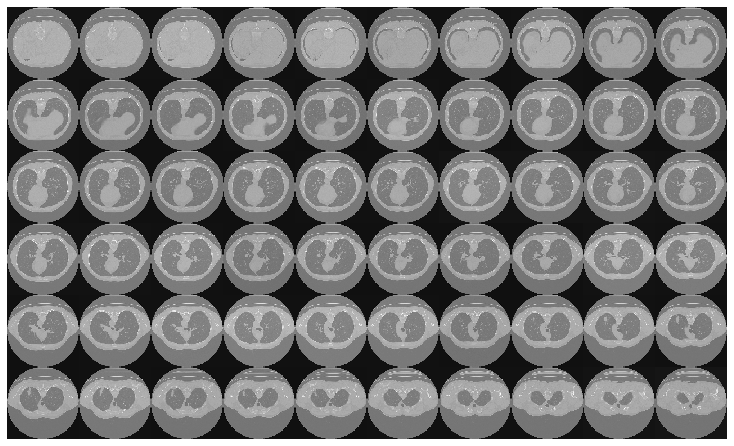

In [13]:
from numpy.random import rand
import matplotlib.pyplot as plt


x = img[:60]

a, b = 6, 10
x = np.reshape(x, (a, b, 128, 128))
test_data = x
r, c = test_data.shape[0], test_data.shape[1]

cmaps = [['viridis', 'binary'], ['plasma', 'coolwarm'], ['Greens', 'copper']]

heights = [a[0].shape[0] for a in test_data]
widths = [a.shape[1] for a in test_data[0]]

fig_width = 10.  # inches
fig_height = fig_width * sum(heights) / sum(widths)

f, axarr = plt.subplots(r,c, figsize=(fig_width, fig_height),
        gridspec_kw={'height_ratios':heights})

for i in range(r):
    for j in range(c):
        axarr[i, j].imshow(test_data[i][j], cmap='gray')
        axarr[i, j].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
#plt.savefig('{}/{}.pdf'.format("{}/outputs/".format(ROOT_DIR), "cancer"), dpi=1000)
plt.show()

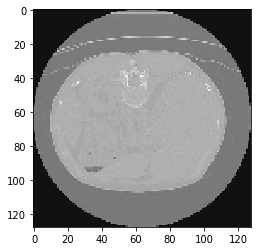

In [16]:
plt.imshow(img[0], cmap='gray')

In [5]:
import numpy
numpy.random.seed(29)
d = numpy.random.randint(0, 2, size=(3,3,3))
d.shape

(3, 3, 3)

In [6]:
d.nonzero()

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]),
 array([0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2]),
 array([0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2]))

In [7]:
z,x,y = d.nonzero()

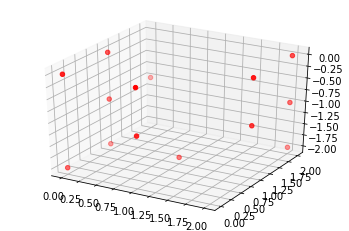

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red')
#plt.savefig("demo.png")

(30,) (30,)
(30, 30)


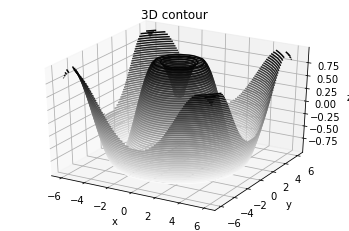

In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))


x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
print(x.shape, y.shape)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)

print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()